* ## Simulation d’une marche aléatoire
1. Simulation d’une marche aléatoire sur une ligne avec probabilité p d’aller à droite et 1 − p d’aller à
gauche (Attention aux états de bords). L’intervalle de la marche sera borné f−N; : : : ; 0; : : : ; Mg. Le
processus part de l’état initial 0.
2. Implémenter un simulateur d’une marche aléatoire en 1 dimension
3. Dessinez l’évolution de la marche au cours du temps


[0, 1, 0, -1, -2, -1, -2, -3, -4, -3, -2, -1, 0, -1, 0, -1, -2, -1, 0, 1, 0, 1, 2, 3, 4, 5, 5, 4, 5, 5, 4, 5, 5, 4, 5, 4, 5, 5, 4, 5, 5, 5, 4, 3, 2, 3, 4, 5, 5, 5, 4, 5, 5, 4, 3, 2, 1, 2, 1, 0, 1, 2, 3, 2, 1, 0, -1, 0, -1, 0, -1, -2, -1, 0, -1, -2, -3, -4, -5, -4, -3, -4, -3, -4, -5, -5, -5, -5, -4, -5, -5, -4, -3, -4, -3, -4, -3, -2, -3, -4, -3]


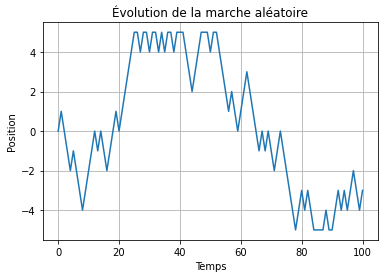

[[0.5 0.5 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.5]]


In [128]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Exercice 1 : Marche aléatoire 1D
# Question 1 : Simulation d’une marche aléatoire sur une ligne avec probabilité p d’aller à droite et 1 − p d’aller à gauche (Attention aux états de bords)
# pour aller de 0 vers 1 : random.random() < p (p=0.5) sinon on part à gauche (1-p) et les bornes sont -N et M 
def marche_aleatoire(p, N, M,k):
    list = []
    x = 0
    list.append(x)
    rand = random.uniform(0,1)
    for i in range(k):
        if x == -N:
            x += 1 if random.uniform(0,1) >= p else +0
        elif x == M:
            x -= 1 if random.uniform(0,1) < p else +0
        else:
            x += 1 if random.uniform(0,1) < p else -1
        list.append(x)
    return list

# Test de la fonction marche_aleatoire
p = 0.5
N = 5
M = 5
k = 100
result=marche_aleatoire(p, N, M,k)
print(result)
    
def graphe(liste):
    plt.plot(liste)
    plt.xlabel('Temps')
    plt.ylabel('Position')
    plt.title('Évolution de la marche aléatoire')
    plt.grid(True)
    plt.show()

# Test de la fonction graphe
graphe(result)

# Matrice de transition selon p et 1-p de -N vers M 
def matrice_transition(p, N, M):
    mat = np.zeros((M+N+1, M+N+1))
    for i in range(M+N+1):
        for j in range(M+N+1):
            
            if i == j:
                if i == 0:
                    mat[i][j] = 1 - p
                elif i == M + N:
                    mat[i][j] = p
                else :
                    mat[i][j] = 0
            elif i == j + 1 :
                mat[i][j] = p
            elif i == j - 1 :
                mat[i][j] = 1 - p

    return mat
# Test de la fonction matrice_transition
P = np.array(matrice_transition(p, N, M))
print(P)


# 4. Calculer l’évolution temporel du vecteur de la proportion de temps passé par la chaine de Markov dans chaque état

{0: 0.10891089108910891, 1: 0.06930693069306931, -1: 0.10891089108910891, -2: 0.06930693069306931, -3: 0.0891089108910891, -4: 0.09900990099009901, 2: 0.0594059405940594, 3: 0.04950495049504951, 4: 0.09900990099009901, 5: 0.16831683168316833, -5: 0.06930693069306931}


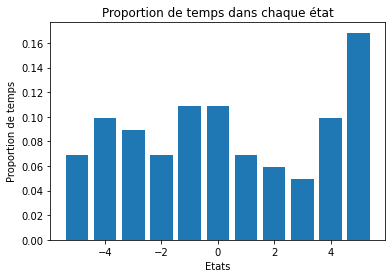

In [129]:
def proportion_temps(liste):
    dico = {}
    for i in range(len(liste)-1):
        if liste[i] in dico:
            dico[liste[i]] += 1
        else:
            dico[liste[i]] = 1
    for cle in dico:
        dico[cle] = dico[cle]/len(liste)
    return dico
# Test de la fonction proportion_temps
resultat=proportion_temps(result)
print(resultat)
# affichage des  résultats dans comme des barres
def graphique(dico):
    x = np.array(list(dico.keys()))
    y = np.array(list(dico.values()))
    plt.bar(x, y)
    plt.xlabel('Etats')
    plt.ylabel('Proportion de temps')
    plt.title('Proportion de temps dans chaque état')
    plt.show()
graphique(resultat)


    

- ## 2 Power method
L’algorithme "Power Method" (PM) [1] se base sur la multiplication successive du vecteur de probabilité
par la matrice de transition afin de calculer le vecteur π des probabilités stationnaires de lan chaine de
Markov (sous l’hypothèse de son existence).
L’algorithme est le suivant :
1. x(0) vecteur état initial,
2. Répéter sur k = 1; 2; : : : jusqu’à la condition d’arrêt,
3. x(k) = x(k − 1)P,
4. Si ||x(k) − x(k − 1)|| ≤ € alors STOP, sinon refaire à partir de l’étape 3.
Implémenter cet algorithme et calculer la métrique suivante
x¯(N) = 1
N
N+1
X k
=0
x(k)
sur l’exemple de la marche aléatoire précédente. Faites également une graphique de l’évolution temporel de
x¯(N) en fonction de N.

Vecteur π :   [0.09119448 0.09007603 0.09222233 0.08922207 0.09283323 0.08890373
 0.09283323 0.08922207 0.09222233 0.09007603 0.09119448]
somme des composantes du vecteur π :  1.0
Nombre d'itérations : 108


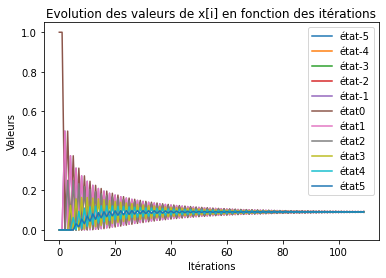

In [135]:
# algorithme de power method
def power_method(P, x0, eps, N):
    liste = []
    x = x0
    liste.append(x)
    for i in range(N):
        x_new = np.dot(P, x)
        liste.append(x)
        if np.linalg.norm(x_new - x) < eps:
            return x_new, i , liste
        x = x_new
    return x, N, liste
# exemple  d'utilisation
x0 = np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0,0])
eps = 0.01
max_iter = 1000
x, iterations , liste = power_method(P, x0, eps, max_iter)
print("Vecteur π :  ", x)
print("somme des composantes du vecteur π : ", np.sum(x))
print("Nombre d'itérations :", iterations)
# une graphique de l'evolution des valeurs de x[i] en fonction des itérations
def graphe_evol (liste, iterations):
    for i in range(len(liste[0])):
        plt.plot([x[i] for x in liste], label = 'état'+str(i-N))
    plt.xlabel('Itérations')
    plt.ylabel('Valeurs')
    plt.title('Evolution des valeurs de x[i] en fonction des itérations')
    plt.legend()
    plt.show()
graphe_evol(liste, iterations)




- ## GooglePage Rank
- L’algorithme initial de "GooglePage Rank" (GPR) [2] est exactement l’algorithm PM avec la matrice suivante :
- Aα = (1 − α)A + αeT x(0); et e = (1; 1; : : :).
- Utiliser l’algorithme GPR sur un graphe de votre choix (qui représente le lien entre des pages web comme 
l’exemple ci-dessous) tout en supposant qu’il est toujours possible de revenir à la page d’accueil de google à 
partir de n’importe quelle page. Dans la version initiale de l’algorithme, le paramètre α = 0:15. 
- A partir de la convergence de l’algorithme, déterminer le rang des noeuds de votre graphe (pages web).